# Rinforcement Learning Code Hand-on

This notebook is a tutorial to explain and showcase how to use RL algorithms like: Q learning (model-free version and the DQN version), Sarsa, MC and how they differ, using Pytorch and OpenAI Gymnasium library. This notebook will give you a very straightford overview on how RL algorithms works with real examples. I delibrately made the code redundent to showcase the difference and similarities of the differents algorithms. 

Happy learning!

## Sections

1. **Algorithm overview**

2. **Q learning**

3. **Double Q Learning**

4. **Monte Carlo**

5. **Sarsa**

6. **Deep Q Network**

7. **Experementing with other Games from the library**

## Cliff walking:  Task Definition 

The agent has to decide between 4 actions - Right, Left, Bottom or Up.

As the agent observes the current state of the environment and chooses an action, the environment transitions to a new state, and also returns a reward that indicates the consequences of the action.

In this task, Each time step incurs -1 reward, unless the player stepped into the cliff, which incurs -100 reward. Getting to the target gives you a +100 reward. Obviously, the goal is to get to the target point with more rewards. 
The space is represented by a 12 x 4 (48 observations) with 3 x 12 + 1 possible states. The agent observes the position from the environment and choose an action from 4 possible actions. 

You can learn more about it here:
https://gymnasium.farama.org/environments/toy_text/cliff_walking/

In this Notebook, we are going to experiment with multiple RL algorithms: 

1) Q learning: (A) model-free Q learning (classical one) which uses a Q table to predict the expected value, (B) Double Q learning to fix the problem of maximization bias, and (C) Deep Q Network, which uses a network to predict the expected value for each action, given the input state. The action with the highest expected value is then chosen. 

2) Monte Carlo

3) Sarsa

Happy Coding!


## TD (Temporal difference learning)

To Explain Q-learning, we need first to clarify what is Temporal Difference (TD), undoubtedly the most central idea in Reinforcement learning. TD is a combination of both monte carlo and dynamic programming (You can find more about them here). Like Monte Carlo, TD learns directly from <i> experience </i> without needing to model the environment's dynamics. Like DP, TD use <i> bootstrapping </i> to estimate the values of subsequent states to determine the value of the current state. Essentially, it involves leveraging "estimated" information from future states to improve our understanding of the current state without waiting for the "actual" outcome. 

Both TD and Monte Carlo use experience following some policy $\pi$ to update their estimate for value $V(S_t)$. Whereas, MC methods need to wait until the end of the episode to determine the total return (or Reward $R$) to predict $V(S_t)$, TD on the other hand just wait until the next time step $t+1$ to form a <i>target</i> by updating $R_{t+1}$ and estimating $V(S_{t+1})$. We call this TD(0) or one step TD where the target is based solely on the next step $t+1$ outcome. This is a special case of TD($\gamma$) with $\gamma$ time steps. In a nutshell, Monte Carlo approach require us to wait for the final outcome to estimate the current state because we don't know yet the "true return" of that episode. On the other hand, TD waits for the $\gamma$ next steps or simply the next step $t_1$.


$$ V(S_1) \leftarrow V(S_t) + \alpha \left[ (R_{t+1} + \gamma V(S_{t+1}) ) - V(S_t) \right] $$

$V(S_t)$ represents the value function for current state $S_t$ that estimate . 

$\alpha$ is the learning rate (a positive constant).

$R_{t+1}$ is the immediate reward received after transitioning from state $S_t$ to state $S_{t+1}$.

$\gamma$ is the discount factor (a value between 0 and 1) that accounts for future rewards.

DP methods try to solve problems by breaking them down into smaller subproblems and solving those subproblems first.
Like DP, TD use bootstrapping to update estimates based on other estimates—to iteratively improve our understanding of the overall problem. The future reward $v_\pi(S_t)$ from the current state $S_t$ and following the policy $\pi$ is the current reward plus the next step future reward $v_\pi(S_{t+1})$. Note that here the current reward is actually $R_{t+1}$ and not $R_t$, because it is the observed reward from transitioning from $S_t$ to $S_{t+1}$ using a policy. 

$$v_\pi(S_t) = \mathop{\mathbb{E}} [G_t | S_t] = \mathop{\mathbb{E}} [R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t]$$

The DP target is an estimate not because of the expected values $V(S_t)$ (provided by a model of the environment), but because the "actual or optimal" $v_\pi(S_{t+1})$ value is not known yet and therefore we rely on the estimate $V(S_{t+1})$.

$$  (R_{t+1} + \gamma V(S_{t+1}) ) - V(S_t) $$

We refer to this term as the TD error that we are going to be using to update $V(S_t)$ of the current state by multplying it by a small step $\alpha$ value. This Equation can be understood by saying that we are getting the TD error between the current prediction or estimation $V(S_t)$ and the better estimatation  $R_{t+1} + \gamma V(S_{t+1})$, which depends on the next reward and the next estimation state. We say that it is a "better estimate" because it is relying on the observed reward $R_{t+1}$ when we transition to the next time step.

### Why TD is better?

TD methods have an advantage over DP methods because they do not require a model of the environment (of all its actual rewards and probability distributions). Also, TD is better than MC, because they can be implemented in an online, incremental fasion, as it can learn one guess from the next without waiting for an actual outcome (only wait one time step). MC, on the other hand, must wait until the end of the episode, because only then that the return is known. Some application have very long episodes which can make training slower. This can be easily observed by comparing the code of TD methods like Q_learning / SARSA and that of Monte Carlo down below.

## Q-learning (Tabular method): Off-policy TD Algorithm

Q-learning is a model-free, value (Reward) based  and off-policy RL algorithm. The “Q” stands for <i>quality</i>, representing how valuable an action is in maximizing future rewards for a given state. It aims to maximize the value function Q, which estimates the expected cumulative reward. 

Iteratively, the agent adjusts its strategy over time to make optimal decisions in various situations. The algorithm uses a Q-Table to find the best action for each state, maximizing expected rewards.

Q-Learning computes the difference between the current Q-value and the maximum Q-value of the time step over all possible actions: 

$$  Q(s_t, a_t) = Q(s_t, a_t) + \alpha \left( R_{t+1} + \gamma \max_a Q(s_{t+1}, a) - Q(s_t, a_t) \right)  $$

Q-learning updates the Q-value using the maximum Q-value over all possible actions for the next state, which helps it focus on the best possible action every step. 

It explores aggressively, even if the current policy is different, aiming to learn the optimal policy <i>independently of the agent’s actions</i>. And this is why it is an <b>off-policy algorithm</b>.

### How Does it Work?

At each step:
You’re in a specific state (S) (a maze cell).
You choose an action (A) (e.g., move left, right, up, or down).
Based on that action, you receive a reward (cheese or poison).
You end up in the next state (S1) (a neighboring cell).
You then decide on another action (A1) for the next step.

### Algorithm 

Parameters: step size $\alpha = (0, 1]$, small greedy $\epsilon > 0$
Initilize Q(s, a), for s reprenting all states and a representing all possible actions, arbitrarily except that Q(terminal, ) = max reward value.

1. **Initialize** Q-values for all state-action pairs (Q-table).
2. **Loop over episodes**:
   - Initialize the current state: $S = S_0$.
   - **Loop over each step of the current episode**:
     - Choose an action $a$ from state $S$ using a policy derived from Q (e.g., $\epsilon-greedy$ strategy).
     - Take action $a$, observe the reward $R_t$ and the next state $S_{t+1}$.
     - Update the Q-table with the observed reward and next state values.
     - Compute the **TD error**:
      $$  \text{error} = (R_{t+1} + \gamma \max_a Q(S_{t+1}, a)) - Q(S_t, a_t) $$
     - Update the Q-value using the step size $\alpha$ and the calculated TD error:
      $$  Q(S_t, a_t) = Q(S_t, a_t) + \alpha \cdot \text{error} $$
     - Transition to the next step: $S_t \leftarrow S_{t+1}$.
   - **Repeat until the current state is terminal** (i.e., $S_t = S_{\text{end}}$).






## Import dependencies

In [2]:
import gymnasium as gym
import math
import random
import time
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import namedtuple, deque
from itertools import count
import numpy as np
import pandas as pd
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

#This is the environment or game to be used with rgb output (from render)
#env = gym.make("CartPole-v1", render_mode='rgb_array')
env = gym.make('CliffWalking-v0', render_mode='rgb_array')

# Get number of actions from gym action space
n_actions = env.action_space.n
#State values can be from 0 to 48, we have a grid of 12 * 4 (with only 32 possible observations)
state, info = env.reset()
# Get the number of state observations (12 * 4 = 48)
n_observations = 48

#Use this for plotting to avoid waiting infinitely
total_n_steps = 1000

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

## Utility function for plotting and environment rendering

In [3]:
#Track episode duration when training / evaluating 
episode_durations = []

def plot_durations(show_result=False):
    plt.figure(1)
    durations_t = torch.tensor(episode_durations, dtype=torch.float)
    if show_result:
        plt.title('Result')
    else:
        plt.clf()
        plt.title('Training...')
    plt.xlabel('Episode')
    plt.ylabel('Duration')
    #plt.ylabel('Total Reward')
    plt.plot(durations_t.numpy())
    # Take 100 episode averages and plot them too
    if len(durations_t) >= 100:
        means = durations_t.unfold(0, 100, 1).mean(1).view(-1)
        means = torch.cat((torch.zeros(99), means))
        plt.plot(means.numpy())

    plt.pause(0.01)  # pause a bit so that plots are updated
    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

def smooth(data, smoothing_factor):
    smoothed_data = []
    for i in range(len(data)):
        if i < smoothing_factor:
            smoothed_data.append(np.mean(data[:i+1]))
        else:
            smoothed_data.append(np.mean(data[i-smoothing_factor+1:i+1]))
    return smoothed_data

def plot_final(list_of_lists, list_of_names, smoothing_factor=20):
    
    # Create a single figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot each list with smoothing
    for i, lst in enumerate(list_of_lists):
        name = list_of_names[i]
        smoothed_lst = smooth(lst, smoothing_factor)
        ax.plot(smoothed_lst, label=name)

    # Customize the plot (adjust as needed)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Durations')
    ax.set_title('Comparison of algorithms')
    ax.legend()


# Function to render and display the environment using Q table
def display_environment(env, Q_table):
    done = False
    state, _ = env.reset()
    plt.figure()

    img = plt.imshow(env.render())  # Initialize the rendering with an empty frame

    total_reward = 0
    for t in range(total_n_steps):  # Run for a set number of time steps

        action = np.argmax(Q_table[state])  # Select action from Q-table
        state, reward, terminated, truncated, _ = env.step(action)  # Take a step

        total_reward += reward

        frame = env.render()  # Render the environment to an RGB array

        img.set_data(frame)  # Update the rendering
        clear_output(wait=True)
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        time.sleep(0.1)  # Pause to slow down the rendering

        if terminated or truncated:
            print("Game over! Total Reward: "+str(total_reward))
            break

            

## Monte Carlo Simulation

In [3]:
#Testing with Monte Carlo Simulation

def eval_q(env, Q, n_sim=5):
    """Use Monte Carlo evaluation."""
    episode_rewards = np.zeros(n_sim)
    
    for episode_id in tqdm(range(n_sim)):
        state, _ = env.reset()
        done = False
        
        while not done:
            action = np.argmax(Q[state])
            state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            episode_rewards[episode_id]+=reward

    return episode_rewards

## Q Learning Code

In [26]:
# Q-Learning algorithm

alpha = 0.1  # Learning rate (make sure to choose a high lr)
gamma = 0.98  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
min_epsilon = 0.01  # Minimum exploration rate
episodes = 600  # Number of episodes
#saving_episodes = 100

# Initialize Q-table
#Shape = (32, 4)
Q_table = np.zeros((n_observations, n_actions))

episode_durations = []

# wrap the env in the record video
#env = gym.wrappers.RecordVideo(env=env, video_folder="videos/q_learning", name_prefix="training", episode_trigger=lambda x: x % saving_episodes == 0)

# Start the recorder
#env.start_video_recorder()

for episode in range(0, episodes):

    state, _ = env.reset()  # Get initial state
    total_reward = 0
    
    #for step in range(max_steps):
    for t in count():

        # Epsilon-greedy action selection for initial state
        # Note: make sure to do this exploit/explore inside the time step loop to make sure we are doing this on every step
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[state])
            # or action = best_next_action

        # Take action and observe the result
        next_state, reward, terminated, truncated, _ = env.step(action)

        total_reward += reward
        
        #Always pick the next best action using the current policy (and not the target policy)
        best_next_action = np.argmax(Q_table[next_state])

        # Update Q-value using the Bellman equation
        Q_table[state][action] += alpha * (reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action])
        
        state = next_state  # Move to the next state

        if terminated:
            #We can also use t for total duration instead of total reward
            episode_durations.append(t+1)
            #episode_durations.append(total_reward)
            if t % 10 == 0:
                plot_durations()
            break

    # Decay epsilon for exploration-exploitation balance
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

print("Training finished.\n")

# Don't forget to close the video recorder before the env!
#env.close_video_recorder()

#Save for plotting
q_learning_list = episode_durations

env.close()

Training finished.



<Figure size 640x480 with 0 Axes>

## Testing Model

In [5]:
#Return average reward across all simulation
reward = np.mean(eval_q(env, Q_table, n_sim=10000))
print("Average Reward across all simulations is: "+ str(reward))


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:03<00:00, 2860.39it/s]

Average Reward across all simulations is: -13.0


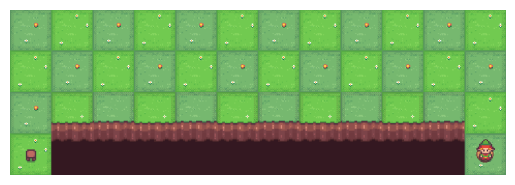

Game over! Total Reward: -13


In [6]:
# Example usage (assuming you have your Q-table and environment initialized)
# Q_table = np.zeros((number_of_states_per_dimension, number_of_actions))  # Initialize your Q-table
display_environment(env, Q_table)

## Analysis

We notice here that after few episodes of training, the agent learns the optimal solution to get to the end goal with a reward of -13 by following the dangerous path of following the border of the cliff (since there are in total 13 steps and every step the agent accumulates a -1 reward). Even when doing the Monte Carlo simulation, we get an average of -13 which means that the model is confident about the strategy even whith random simulation.

# Maximization Bias problem

Because of the max operation in the update equation, Q-learning tends to sometimes overestimate q-values, leading to suboptimal policies by following a biased estimation. You can think of it as the agent always starting by turning right first, after many episodes it can start to learn to overcome this biased approach and it starts to convert to a different and better strategy.
This overestimation problem is known as the <b>maximization bias</b>. 


## Solution: Double Q-learning

Double Q-learning introduces a subtle improvement to mitigate the maximization bias.
Instead of relying on a single q-value estimate, it maintains two separate q-value functions: Q1 and Q2.
During updates, one function (e.g., Q1) selects the best action, while the other (Q2) evaluates that action.
The update equation alternates between Q1 and Q2, reducing the overestimation effect.
The final policy is derived from the average or sum of Q1 and Q2.

## Advantages

Double Q-learning provides faster transient performance compared to standard Q-learning.
It reduces the maximization bias, leading to better policies over a shorter period of training time.

## Python Code

In [7]:
# Double Q-Learning algorithm

# Playing with these values can drastically change the learning experience

alpha = 0.1  # Learning rate
gamma = 0.98  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
min_epsilon = 0.1  # Minimum exploration rate
episodes = 600  # Number of episodes
saving_episodes = 100

# Initialize Q-table
Q1_table = np.zeros((n_observations, n_actions))
Q2_table = np.zeros((n_observations, n_actions))

episode_durations = []


for episode in range(0, episodes):

    state, _ = env.reset()  # Get initial state
    total_reward = 0
    
    #for step in range(max_steps):
    for t in count():

        # Epsilon-greedy action selection
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            #Sum or average
            #action = np.argmax(Q1_table[state] + Q2_table[state])
            action = np.argmax((Q1_table[state] + Q2_table[state])/2.)

        # Take action and observe the result
        #next_state, reward, done, _ = env.step(action)
        next_state, reward, terminated, truncated, _ = env.step(action)

        total_reward += reward

        if np.random.rand() < 0.5:
            best_next_action = np.argmax(Q1_table[next_state])
            Q1_table[state][action] += alpha * (reward + gamma * Q2_table[next_state][best_next_action] - Q1_table[state][action])
        else:
            best_next_action = np.argmax(Q2_table[next_state])
            Q2_table[state][action] += alpha * (reward + gamma * Q1_table[next_state][best_next_action] - Q2_table[state][action])
        
        
        state = next_state  # Move to the next state
        action = best_next_action

        if terminated:
            #We can also use t instead of total reward
            episode_durations.append(t+1)
            if t % 100 == 0:
                plot_durations()
            break

    # Decay epsilon for exploration-exploitation balance
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

print("Training finished.\n")

#Save for plotting
double_q_learning_list = episode_durations

env.close()

Training finished.



<Figure size 640x480 with 0 Axes>

## Testing Model

In [11]:
#Return average reward across all simulation
reward = np.mean(eval_q(env, Q_table, n_sim=10000))
print("Average Reward across all simulations is: "+ str(reward))

100%|██████████| 10000/10000 [00:03<00:00, 2934.65it/s]

Average Reward across all simulations is: -13.0


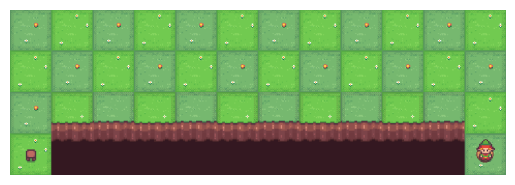

Game over! Total Reward: -13


In [8]:
# Example usage (assuming you have your Q-table and environment initialized)
# Q_table = np.zeros((number_of_states_per_dimension, number_of_actions))  # Initialize your Q-table
#You can use either Q1 or Q2
display_environment(env, Q1_table)

## Q learning vs Double Q learning

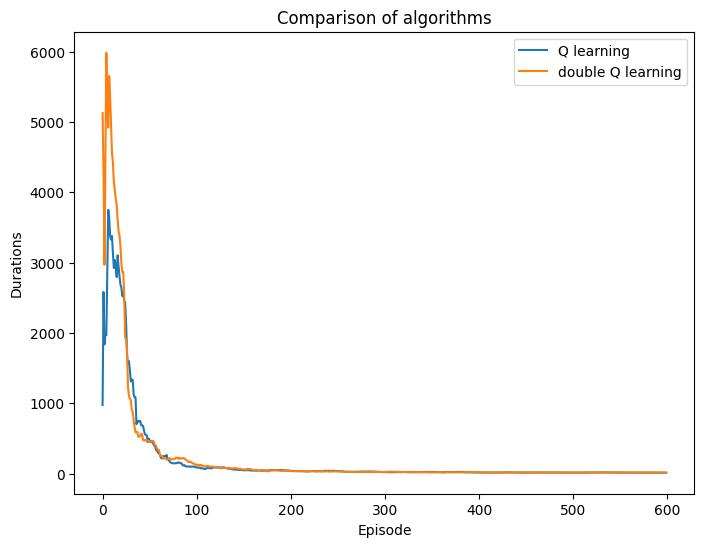

In [33]:
list_plot = [q_learning_list, double_q_learning_list]
list_names = ['Q learning', 'double Q learning']
plot_final(list_plot, list_names)

## Sarsa: On-Policy TD Algorithm

Sarsa (stands for State-Action-Reward-State-Action) is another popular RL algorithm that is <b>on-policy</b>, which is used to learn a new policy for better decision-making. Unlike Q-learning, SARSA considers the action taken in the next state when updating Q-values. It updates its policy based on the actual actions taken by the agent, and thats why it an on-policy algorithm.

$$ Q(s_{t+1}, a_{t+1}) = Q(s_{t+1}, a) + \alpha \left( R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s, a) \right) $$

SARSA updates the Q-value for the current state-action pair based on the reward, the next state, and the action taken by the current policy.

### Q-learning vs Sarsa

The key difference between Q-learning and SARSA is that SARSA is an on-policy algorithm, meaning it updates the Q-values using the action actually taken by the policy, whereas Q-learning is an off-policy algorithm that updates the Q-values using the action that maximizes the Q-value.
In summary, SARSA is cautious, balancing exploration and exploitation, considering the current policy, while Q-learning boldly explores the best possible actions, for any given policy.

As can be seen, in the code difference, Q-learning: Uses epsilon-greedy for action selection at each step and updates Q-values based on the maximum Q-value for the next state.
SARSA: Uses epsilon-greedy for action selection at each step and updates Q-values based on the action actually taken in the next state.

### How Does it Work?

Imagine an agent navigating an environment (like a robot in a maze).
At each step:
It’s in a state (S).
It takes an action (A).
Receives a reward R.
Ends up in the next state (S1).
Chooses another action (A1) in the next state.
The tuple (S, A, R, S1, A1) represents SARSA.

### Algorithm 

Parameters: step size $\alpha = (0, 1]$, small greedy $\epsilon > 0$
Initilize Q(s, a), for s reprenting all states and a representing all possible actions, arbitrarily except that Q(terminal, ) = max reward value.

1. **Initialize** Q-values for all state-action pairs (Q-table).
2. **Loop over episodes**:
   - Initialize the current state: $S = S_0$.
   - Choose an action $a$ from state $S$ using a policy derived from Q (e.g., $\epsilon-greedy$ strategy).
   - **Loop over each step of the current episode**:
     - Take action $a$, observe the reward $R_t$ and the next state $S_{t+1}$.
     - Choose an action $a{t+1}$ from state $S_{t+1}$ using a policy derived from Q (e.g., $\epsilon-greedy$ strategy).
     - Update the Q-table with the observed reward and next state values.
     - Compute the **TD error**:
      $$  \text{error} = (R_{t+1} + \gamma \max_a Q(S_{t+1}, a)) - Q(S_t, a_t) $$
     - Update the Q-value using the step size $\alpha$ and the calculated TD error:
      $$  Q(S_t, a_t) = Q(S_t, a_t) + \alpha \cdot \text{error} $$
     - Transition to the next step: $S_t \leftarrow S_{t+1}$.
   - **Repeat until the current state is terminal** (i.e., $S_t = S_{\text{end}}$).

## Python Code

In [18]:
#Sarsa

alpha = 0.1  # Learning rate
gamma = 0.98  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
min_epsilon = 0.01  # Minimum exploration rate
episodes = 600  # Number of episodes
#max_steps = 200  # Maximum steps per episode #Do this if you want to limit the number of steps in an episode

saving_episodes = episodes

# Initialize Q-table with zeros
#Q_table = np.zeros(DISCRET_NBR + [n_actions])
Q_table = np.zeros((n_observations, n_actions))

episode_durations = []

# wrap the env in the record video
#env = gym.wrappers.RecordVideo(env=env, video_folder="videos/sarsa", name_prefix="training", episode_trigger=lambda x: x % saving_episodes == 0)

# Start the recorder
#env.start_video_recorder()

for episode in range(episodes):
    state, _ = env.reset()  # Get initial state
    total_reward = 0
    
    #for step in range(max_steps):
    for t in count():

        # Epsilon-greedy action selection for initial state
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[state])

        # Take action and observe the result
        next_state, reward, terminated, truncated, _ = env.step(action)

        total_reward += reward
        
        # Update Q-value using the Bellman equation
        #Instead of picking the best action for the next time step, we pick the next action using our current policy function (Q-table)

        # Epsilon-greedy action selection for the next action
        if np.random.uniform(0, 1) < epsilon:
            #Explore
            next_action = np.random.randint(0, n_actions)
        else:
            #Exploit
            next_action = np.argmax(Q_table[next_state])

        Q_table[state][action] += alpha * (reward + gamma * Q_table[next_state][best_next_action] - Q_table[state][action])
        
        state = next_state  # Move to the next state
        action = next_action

        if terminated:
            #We can also use t instead of total reward
            episode_durations.append(t + 1)
            if(t % 10 == 0):
                plot_durations()
            break

    # Decay epsilon for exploration-exploitation balance
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    
sarsa_list = episode_durations

print("Training finished.\n")

# Don't forget to close the video recorder before the env!
#env.close_video_recorder()

env.close()

Training finished.



<Figure size 640x480 with 0 Axes>

## Testing 

In [19]:
#Return average reward across all simulation
reward = np.mean(eval_q(env, Q_table, n_sim=10000))
print("Average Reward across all simulations is: "+ str(reward))

100%|██████████| 10000/10000 [00:02<00:00, 3622.15it/s]

Average Reward across all simulations is: -13.0


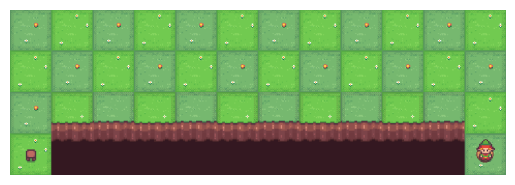

Game over! Total Reward: -13


In [12]:
# Example usage (assuming you have your Q-table and environment initialized)
# Q_table = np.zeros((number_of_states_per_dimension, number_of_actions))  # Initialize your Q-table
display_environment(env, Q_table)

# Monte Carlo Code

In [22]:
#Monte Carlo (MC)

alpha = 0.1  # Learning rate
gamma = 0.98  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
min_epsilon = 0.01  # Minimum exploration rate
episodes = 600  # Number of episodes
#max_steps = 200  # Maximum steps per episode #Do this if you want to limit the number of steps in an episode

# Initialize Q-table with zeros
Q_table = np.zeros((n_observations, n_actions))

episode_durations = []

for episode in range(episodes):
    state, _ = env.reset()  # Get initial state
    total_reward = 0

    # Epsilon-greedy action selection for initial state
    if np.random.uniform(0, 1) < epsilon:
        action = np.random.randint(0, n_actions)
    else:
        action = np.argmax(Q_table[state])

    #Init values
    state_trajectory = []
    action_trajectory = []
    reward_trajectory = []
    
    #for step in range(max_steps):
    for t in count():

        # Take action and observe the result
        next_state, reward, terminated, truncated, _ = env.step(action)

        total_reward += reward

        #Store values for the current time step
        state_trajectory.append(state)
        action_trajectory.append(action)
        reward_trajectory.append(reward)

        # Epsilon-greedy action selection for the next action
        if np.random.uniform(0, 1) < epsilon:
            #Explore
            next_action = np.random.randint(0, n_actions)
        else:
            #Exploit
            next_action = np.argmax(Q_table[next_state])
        
        state = next_state  # Move to the next state
        action = next_action

        if terminated:
            #We can also use t instead of total reward
            episode_durations.append(t + 1)
            if episode % 10 == 0:
                plot_durations()
            break

    # At end of episode (Because we are using MC), update Q-table for full trajectory

    # Calculate returns and update Q-table
    G = 0
    cum_rewards = 0
    cum_count = 0

    for t in reversed(range(len(reward_trajectory))):

        reward = reward_trajectory[t]
        action = action_trajectory[t]
        state = state_trajectory[t]

        G = gamma * G + reward

        # first-visit MC method
        #You can use to average the total cum rewards for better smoother update
        Q_table[state][action] += alpha * (G - Q_table[state][action])
        

    # Decay epsilon for exploration-exploitation balance
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    

print("Training finished.\n")

mc_list = episode_durations

#print(f'Test Total Reward: {total_reward}')
env.close()


Training finished.



<Figure size 640x480 with 0 Axes>

## Testing 

In [23]:
#Return average reward across all simulation
reward = np.mean(eval_q(env, Q_table, n_sim=10000))
print("Average Reward across all simulations is: "+ str(reward))

100%|██████████| 10000/10000 [00:04<00:00, 2254.32it/s]

Average Reward across all simulations is: -17.0


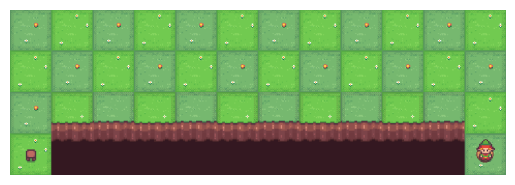

Game over! Total Reward: -17


In [24]:
# Example usage (assuming you have your Q-table and environment initialized)
# Q_table = np.zeros((number_of_states_per_dimension, number_of_actions))  # Initialize your Q-table
display_environment(env, Q_table)

## Comparison and Analysis

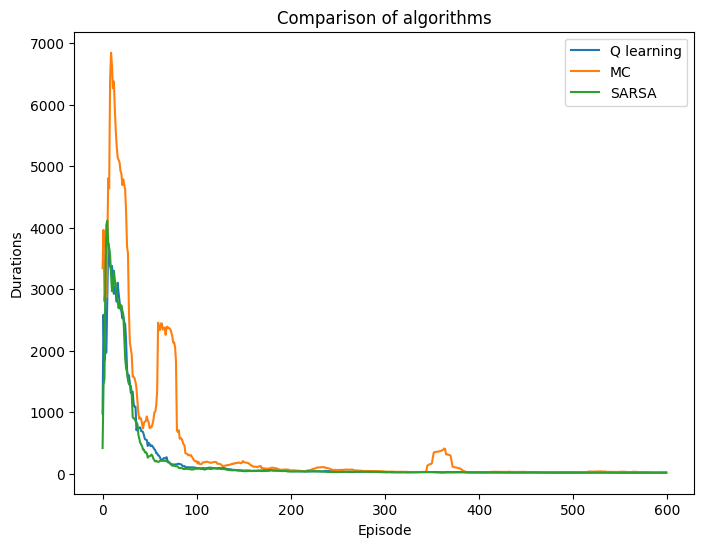

In [34]:
list_plot = [q_learning_list, mc_list, sarsa_list]
list_names = ['Q learning', 'MC', 'SARSA']
plot_final(list_plot, list_names)

## Deep Q Network (DQN)

The main difference between the standard Q-learning algorithm and DQN (Deep Q Neural Networks) is that DQN uses a deep neural network to approximate the Q-values, while Q-learning relies on a Q-table to store the values.

We’ll be using experience replay memory for training our DQN. It stores the transitions that the agent observes, allowing us to reuse this data later. By sampling from it randomly, the transitions that build up a batch are decorrelated. It has been shown that this greatly stabilizes and improves the DQN training procedure. 

In this Part, we will start by implementing the basic DQN algorithm then we are going to add the suggestions mentioned in the blog below and see how that helps training.

From: https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

In [5]:
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))


class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        """Save a transition"""
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [6]:
class DQN(nn.Module):

    def __init__(self, n_observations, n_actions):
        super(DQN, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    # Called with either one element to determine next action, or a batch
    # during optimization. Returns tensor([[left0exp,right0exp]...]).
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)

In [7]:
# BATCH_SIZE is the number of transitions sampled from the replay buffer
# GAMMA is the discount factor as mentioned in the previous section
# LR is the learning rate of the ``AdamW`` optimizer
BATCH_SIZE = 32
GAMMA = 0.98
LR = 1e-4
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.995  # Decay rate for exploration rate
min_epsilon = 0.01  # Minimum exploration rate
episodes = 600  # Number of episodes
max_steps = 300

#Track the duration of the epipsodes
episode_durations = []

policy_net = DQN(n_observations, n_actions).to(device)

optimizer = optim.AdamW(policy_net.parameters(), lr=LR, amsgrad=True)

memory = ReplayMemory(10000)

criterion = nn.SmoothL1Loss()

steps_done = 0



In [8]:
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = memory.sample(BATCH_SIZE)
    # Transpose the batch (see https://stackoverflow.com/a/19343/3343043 for
    # detailed explanation). This converts batch-array of Transitions
    # to Transition of batch-arrays.
    batch = Transition(*zip(*transitions))

    # Compute a mask of non-final states and concatenate the batch elements
    # (a final state would've been the one after which simulation ended)
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)
    
    # Compute Q(s_t, a) - the model computes Q(s_t), then we select the
    # columns of actions taken. These are the actions which would've been taken
    # for each batch state according to policy_net
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) for all next states.
    # Expected values of actions for non_final_next_states are computed based
    # on the "older" target_net; selecting their best reward with max(1).values
    # This is merged based on the mask, such that we'll have either the expected
    # state value or 0 in case the state was final.
    next_state_action_values = torch.zeros(BATCH_SIZE, device=device)
    with torch.no_grad():
        next_state_action_values[non_final_mask] = policy_net(non_final_next_states).max(1).values

    # Compute the expected Q values
    expected_state_action_values = (next_state_action_values * GAMMA) + reward_batch

    # Compute Huber loss
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    # In-place gradient clipping
    torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()

In [12]:
# Function to render and display the environment
def display_environment(env, policy_net):
    state, _ = env.reset()
    plt.figure()

    img = plt.imshow(env.render())  # Initialize the rendering with an empty frame

    total_reward = 0 

    for t in range(1000):  # Run for a set number of time steps

        #Get one hot embeddings from index value
        y = state
        state = np.zeros(n_observations)
        state[y] = 1
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

        action = policy_net(state).argmax().item()  # Select action
        state, reward, terminated, truncated, _ = env.step(action)  # Take a step
        total_reward += reward
        frame = env.render()  # Render the environment to an RGB array
        img.set_data(frame)  # Update the rendering
        clear_output(wait=True)
        plt.imshow(frame)
        plt.axis('off')
        plt.show()
        time.sleep(0.01)  # Pause to slow down the rendering

        if terminated:
            print("Game over! Total Reward: "+str(total_reward))
            break

Complete


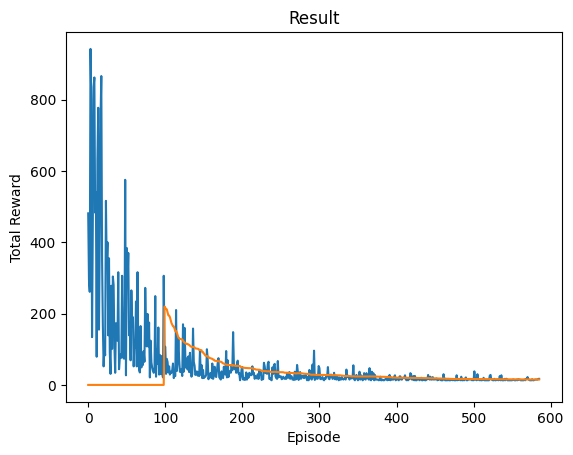

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
if torch.cuda.is_available() or torch.backends.mps.is_available():
    num_episodes = 2000
else:
    num_episodes = 600

for i_episode in range(num_episodes):
    # Initialize the environment and get its state
    state, info = env.reset()

    #Get one hot embeddings from index value
    y = state
    state = np.zeros(n_observations)
    state[y] = 1
    state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

    #Instead of looping until the end of the episode. Should a max number of steps. Because an episode can last a long time.
    for t in range(max_steps):
    #for t in count():
        if np.random.uniform(0, 1) < epsilon:
            action = torch.tensor([[env.action_space.sample()]], device=device, dtype=torch.long)
        else:
            action = policy_net(state).max(1).indices.view(1, 1)
            
        observation, reward, terminated, truncated, _ = env.step(action.item())
        reward = torch.tensor([reward], device=device)
        done = terminated or truncated

        if terminated:
            next_state = None
        else:
            #Get one hot embeddings from index value
            y = observation
            next_state = np.zeros(n_observations)
            next_state[y] = 1
            next_state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)

        # Store the transition in memory
        memory.push(state, action, next_state, reward)

        # Move to the next state
        state = next_state

        # Perform one step of the optimization (on the policy network)
        optimize_model()

        if terminated:
            episode_durations.append(t + 1)
            if(t % 10 == 0):
                plot_durations()
            break

    # Decay epsilon for exploration-exploitation balance
    epsilon = max(min_epsilon, epsilon * epsilon_decay)

print('Complete')
plot_durations(show_result=True)
plt.ioff()
plt.show()

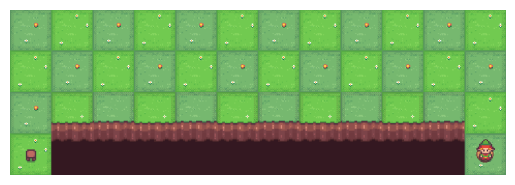

Game over! Total Reward: -13


In [13]:

# Assuming you have your policy network and environment initialized
display_environment(env, policy_net)

## Cart Pole:  Task Definition 

Let's Try a different Env. 

https://gymnasium.farama.org/environments/classic_control/cart_pole/

The agent has to decide between two actions - moving the cart (1) left or (2) right - so that the pole attached to it stays upright.

As the agent observes the current state of the environment and chooses an action, the environment transitions to a new state, and also returns a reward that indicates the consequences of the action.

In this task, rewards are +1 for every incremental timestep and the environment terminates if the pole falls over too far or the cart moves more than 2.4 units away from center. This means better performing scenarios will run for longer duration, accumulating larger return.

In the CartPole environment, the state space consists of four observations. These four observations represent the following physical properties of the cart-pole system:

- Cart Position: The position of the cart on the track.
- Cart Velocity: The velocity of the cart.
- Pole Angle: The angle of the pole with respect to the vertical axis.
- Pole Angular Velocity: The angular velocity of the pole.


Here are the different observations and their ranges. 

| Num | Observation           | Min                  | Max                |
|-----|-----------------------|----------------------|--------------------|
| 0   | Cart Position         | -4.8*                 | 4.8*                |
| 1   | Cart Velocity         | -Inf                 | Inf                |
| 2   | Pole Angle            | ~ -0.418 rad (-24°)** | ~ 0.418 rad (24°)** |
| 3   | Pole Angular Velocity | -Inf                 | Inf                |

From : https://magalimorin18.github.io/reinforcement_learning/td2/discrete.html


The agent take these 4 inputs from the environment without any scaling and (A) store them in a Q-table or (B) pass them through a small fully-connected network in order to output 2 classes, one for each action (left or right). 


In [14]:

#This is the environment or game to be used with rgb output (from render)
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Get number of actions from gym action space
n_actions = env.action_space.n
state, info = env.reset()

n_observations = len(state) # Should be 4 for CartPole

total_n_episodes = 1000

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

## Discretization of the env

Unlike the previous exmaple (Cliff Walking), in this environment (Cartpole), our observation space is represented by float values. Even though our DQN approach can deal with that. If we want to use a Q table, we need to discretize our environment by representing our observation space as a finite set of discrete values.


[-4.8        -5.         -0.41887903 -0.87266463]
[4.8        5.         0.41887903 0.87266463]


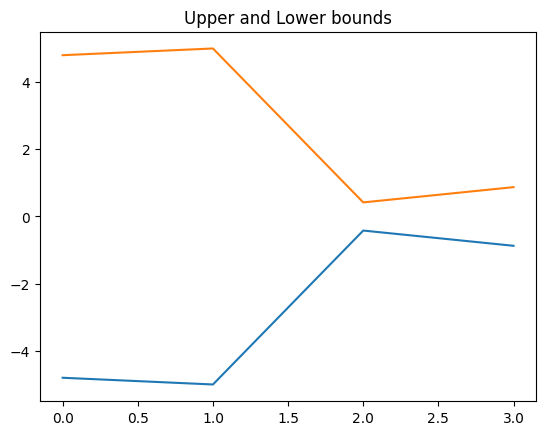

In [15]:
# Discretize the env
DISCRET_NBR = [1, 1, 10, 6] # Number of values per dimension of the state

env_low = env.observation_space.low
env_high = env.observation_space.high
env_low[1], env_high[1] = -5, 5
env_low[3], env_high[3] = -math.radians(50), math.radians(50)
print(env_low)
print(env_high)
plt.plot(env_low)
plt.plot(env_high)
plt.title("Upper and Lower bounds")

#Use this function to map continuous values to their corresponding discrete bins
def convert_state_discrete(state):
    bucket_indice = []
    for state_idx in range(len(state)):
        if state[state_idx] <= env_low[state_idx]:
            bucket_index = 0
        elif state[state_idx] >= env_high[state_idx]:
            bucket_index = DISCRET_NBR[state_idx] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = env_high[state_idx] - env_low[state_idx]
            offset = (DISCRET_NBR[state_idx] - 1) * env_low[state_idx] / bound_width
            scaling = (DISCRET_NBR[state_idx] - 1) / bound_width
            bucket_index = int(round(scaling * state[state_idx] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)

The rest should be pretty similar to the earlier example. Try to train and compare the different RL algorithms on this environment.

<b>Tip:</b> 
The Q table here should have 4 dimensions + 1 dimension for the actions. Every Dimension have its own set of bin values.

In [18]:
Q_table = np.zeros(DISCRET_NBR+[n_actions])
print(Q_table.shape)

(1, 1, 10, 6, 2)
[1, 1, 10, 6, 2]


That's it for this practical Notebook. I hope you enjoyed it and you got to learn something from it! 

And that's a wrap! Keep exploring, keep learning. Onward to the next subject!